In [1]:
import os
import math
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [5]:
import itertools

#### N equispaced points 

In [2]:
N = 50

In [3]:
z = np.linspace(0,1,N)

In [4]:
z

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

### q1. (c)

In [128]:
def kernel(x, sqrt_gamma=0.12):
    coef = 2*sqrt_gamma
    k = np.zeros((len(x), len(x)))
    for ix, x1 in enumerate(x):
        for jx, x2 in enumerate(x):
            k[ix,jx]  = np.exp(-1*((x1-x2)**2/coef))
    return k

In [129]:
K = kernel(z)

In [130]:
def gen_samples(z, kernel, N=20):
    """
    Draw random samples from a multivariate normal distribution 
    with Mean 0, Var Con=Kernel matrix (Gram Matrix)
    """
    for i in range(N):
        y = np.random.multivariate_normal(np.zeros(kernel.shape[0]),kernel,1)
        plt.plot(z,y[0])
    plt.show()

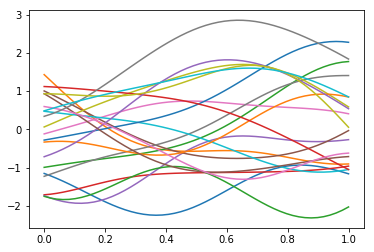

In [131]:
gen_samples(z, K)

In [231]:
np.random.multivariate_normal(np.zeros(K.shape[0]),K,1).shape

(1, 100)

### q1 (d)

##### open gp.dat

In [77]:
with open('./gp.dat', 'r') as f:
    x,y = [], []
    for l in f.readlines():
        line = l[:-1].rstrip(" ").lstrip("\n").lstrip(" ").split(" ")
        data = [float(i) for i in line if not len(i) == 0]
        x += [data[0]]
        y += [data[1]]

In [79]:
len(x), len(y)

(100, 100)

#### plot from f from x

In [154]:
K = kernel(np.asarray(x))

In [133]:
Is = np.diag(np.asarray([i/i for i in range(1,len(x)+1,1)]))

In [157]:
fx = np.random.multivariate_normal(np.zeros(K.shape[0]),K,1)[0]

In [158]:
sigma = np.var(np.asarray(y) - fx)

In [170]:
np.mean(np.asarray(y) - fx)

0.14095631721878907

In [159]:
inv_kerenl = np.linalg.inv(K + sigma**2*Is)

In [160]:
def compute_kernel_vec(x,y, sqrt_gamma=0.12):
    coef = 2*sqrt_gamma
    if not len(x) == len(y):
        raise ValueError('not aligne shape')
    k = np.zeros((len(x)))
    for i in range(len(x)):
        k[i]  = np.exp(-1*((x[i]-y[i])**2/coef))
    return k

In [161]:
kernel_vec = compute_kernel_vec(np.asarray(x),np.asarray(y) )

In [162]:
kernel_vec.shape

(100,)

In [163]:
mu = np.dot(np.matmul(kernel_vec.T,inv_kerenl), np.asarray(y))

In [164]:
mu

-8.204711852962042

In [171]:
def compute_kernel_scaler(x, y, sqrt_gamma=0.12):
    coef = 2*sqrt_gamma
    return np.sum(compute_kernel_vec(x, y))

In [172]:
kernel_scaler = compute_kernel_scaler(y, y)

In [173]:
s_plus = mu + 2*np.sqrt( kernel_scaler - np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec))

In [174]:
np.isnan(s_plus)

False

In [175]:
np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec)

37.81300155797094

In [176]:
np.amax(inv_kerenl)

4.0916603688241695

In [177]:
s_plus

7.567034840670729

In [178]:
s_minus = mu - 2*np.sqrt( kernel_scaler - np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec))

In [179]:
s_minus

-23.976458546594813

### q1 (d)

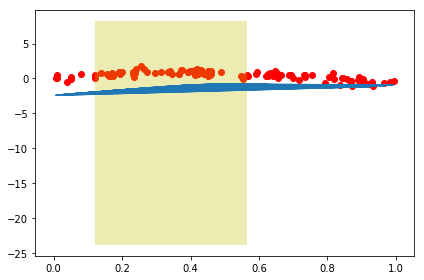

In [230]:
fig = plt.figure()
for i in range(1):
    ax = plt.subplot(1,1,1)
    K = kernel(np.asarray(x))
    fx = np.random.multivariate_normal(np.zeros(K.shape[0]),K,1)[0]
    sigma = 0.5 #np.var(np.asarray(y) - fx)
    inv_kerenl = np.linalg.inv(K + sigma**2*Is)
    kernel_vec = compute_kernel_vec(np.asarray(x),np.asarray(y) )
    mu = np.dot(np.matmul(kernel_vec.T,inv_kerenl), np.asarray(y))
    kernel_scaler = compute_kernel_scaler(y, y)
    s_plus = mu + 2*np.sqrt( kernel_scaler - np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec))
    s_minus = mu - 2*np.sqrt( kernel_scaler - np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec))
    plt.scatter(x, y, label="Train Data", color="red")
    plt.fill_between(x, s_plus, s_minus, facecolor='y',alpha=0.3)
    plt.plot(x,fx)
fig.tight_layout()
plt.show()

## Re-Try

In [232]:
K = kernel(x)

In [237]:
z = np.linspace(0,1,len(x))

In [238]:
fx = np.random.multivariate_normal(np.zeros(K.shape[0]),K,1)[0]

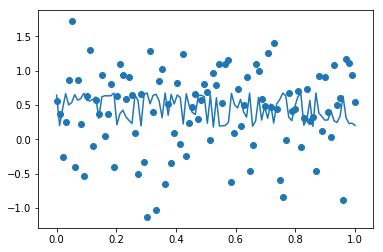

In [240]:
plt.plot(z, fx)
plt.scatter(z,y)

In [243]:
sigma = 1

In [244]:
inv_kerenl = np.linalg.inv(K + sigma**2*Is)

In [245]:
kernel_vec = compute_kernel_vec(np.asarray(x),np.asarray(y) )

In [246]:
mu = np.dot(np.matmul(kernel_vec.T,inv_kerenl), np.asarray(y))

In [247]:
kernel_scaler = compute_kernel_scaler(y, y)

In [248]:
s_plus = mu + 2*np.sqrt( kernel_scaler - np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec))
s_minus = mu - 2*np.sqrt( kernel_scaler - np.dot(np.matmul(kernel_vec.T,inv_kerenl), kernel_vec))

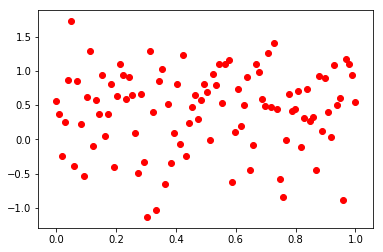

In [249]:
plt.scatter(z, y, label="Train Data", color="red")

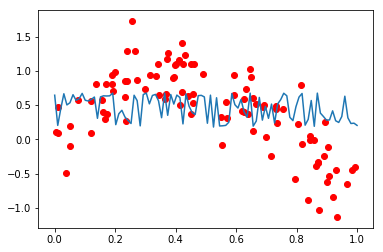

In [250]:
plt.scatter(x, y, label="Train Data", color="red")
plt.plot(z, fx)

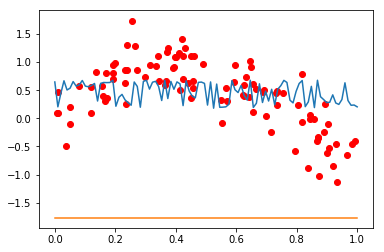

In [258]:
plt.scatter(x, y, label="Train Data", color="red")
plt.plot(z, fx)
plt.plot(z,mu*np.ones((len(z))))

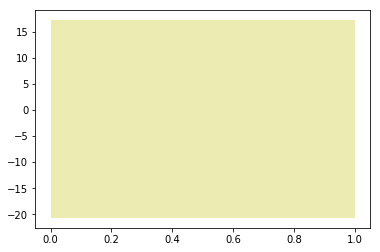

In [253]:
plt.fill_between(z, s_plus, s_minus, facecolor='y',alpha=0.3)

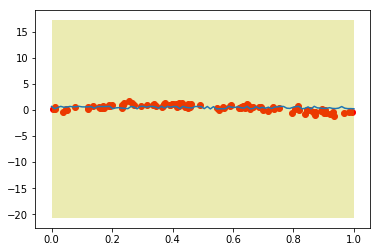

In [254]:
plt.scatter(x, y, label="Train Data", color="red")
plt.plot(z, fx)
plt.fill_between(z, s_plus, s_minus, facecolor='y',alpha=0.3)

## 2nd Try

#### Q.c

In [285]:
def _func(x, kernel, mu=0):
    #return math.cos(x) + np.random.normal(mu,kernel)
    return  np.random.normal(mu,kernel)

In [260]:
def kernel(x, sqrt_gamma=0.12):
    coef = 2*sqrt_gamma
    k = np.zeros((len(x), len(x)))
    for ix, x1 in enumerate(x):
        for jx, x2 in enumerate(x):
            k[ix,jx]  = np.exp(-1*((x1-x2)**2/coef))
    return k

In [286]:
kernel(z).shape

(100, 100)

In [287]:
points_idx = np.random.randint(0,len(z)-1, 20)

In [288]:
points = z[points_idx]

In [289]:
len(points)

20

In [290]:
points

array([0.17171717, 0.88888889, 0.51515152, 0.96969697, 0.70707071,
       0.55555556, 0.31313131, 0.01010101, 0.73737374, 0.78787879,
       0.06060606, 0.25252525, 0.80808081, 0.70707071, 0.78787879,
       0.80808081, 0.81818182, 0.94949495, 0.58585859, 0.06060606])

In [291]:
fx = []
K = kernel(z)
for idx, point in enumerate(points):
    fx += [_func(point, K[points_idx[idx], points_idx[idx]])]

In [303]:
#y_true = [_func(i, K[idx, idx]) for idx, i in enumerate(z) ]

In [308]:
a = np.argsort(points)
a

array([ 7, 19, 10,  0, 11,  6,  2,  5, 18,  4, 13,  8, 14,  9, 12, 15, 16,
        1, 17,  3])

In [312]:
_fx = []
_fx = [ fx[i] for i in a]

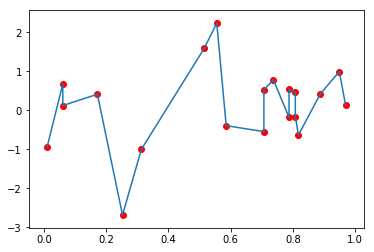

In [315]:
plt.plot([points[i] for i in a], _fx)
plt.scatter(points, fx, c='red')

#### Q.d

In [316]:
K  = kernel(x)

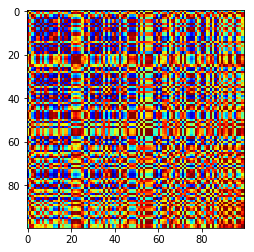

In [318]:
plt.imshow(K, cmap='jet')

In [ ]:
kernel_